Saving eagle.png to eagle.png
Original Image:


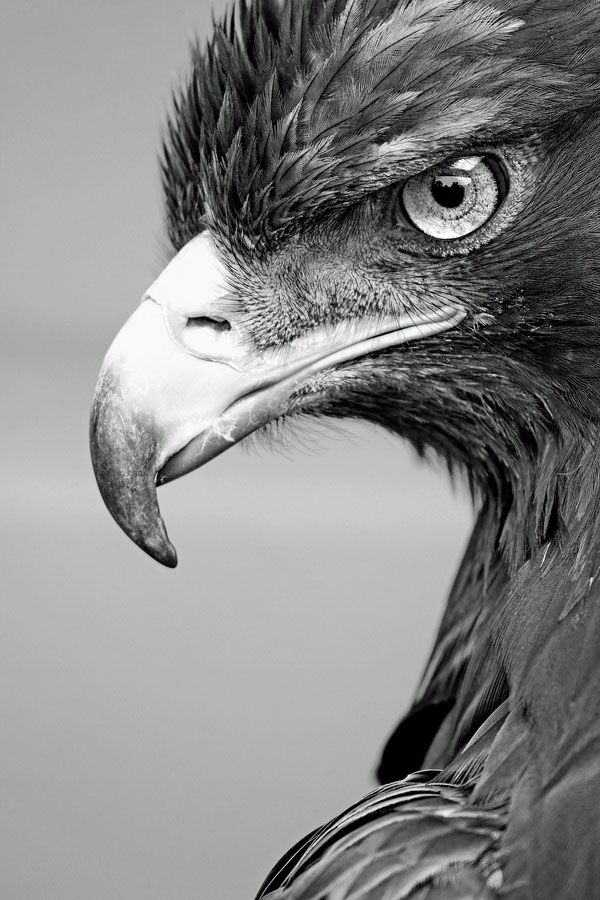

Filtered Image:


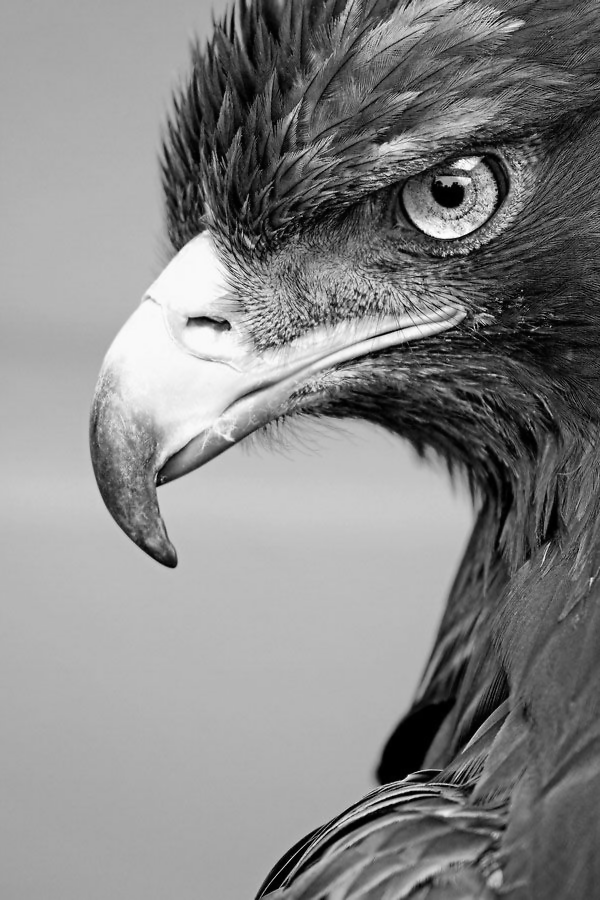

In [6]:
import cv2
import numpy as np
import ipywidgets as widgets
from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import display, clear_output

# Function to apply MMSE FILTER WITH ALL USECASE
def apply_mmse_filter(image, kernel_size, noise_var):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute local mean and variance using a Gaussian filter
    local_mean = cv2.GaussianBlur(image.astype(np.float32), (kernel_size, kernel_size), 0)
    local_var = cv2.GaussianBlur(np.square(image.astype(np.float32) - local_mean), (kernel_size, kernel_size), 0)

    # Compute noise variance estimate
    noise_estimate = np.mean(local_var)

    # Compute MMSE estimate
    mmse_estimate = local_mean + (local_var / (local_var + noise_estimate)) * (image - local_mean)

    # Clip values to ensure they are within valid range
    mmse_estimate = np.clip(mmse_estimate, 0, 255).astype(np.uint8)

    return mmse_estimate


# Function to upload image and apply filter
def upload_and_apply_filter(upload_button):
    # Clear previous outputs
    clear_output()

    # Upload the image
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded.")
        return

    # Assume only one file is uploaded
    filename = next(iter(uploaded))
    image_content = uploaded[filename]

    # Convert the image content to a numpy array
    image_array = np.frombuffer(image_content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Define kernel size and noise variance
    kernel_size = 3
    noise_var = 25

    # Apply the MMSE filter
    filtered_image = apply_mmse_filter(image, kernel_size, noise_var)

    # Display the original and filtered images
    print("Original Image:")
    cv2_imshow(image)
    print("Filtered Image:")
    cv2_imshow(filtered_image)

# Create the upload button
upload_button = widgets.Button(description="Upload Image")
upload_button.on_click(upload_and_apply_filter)

# Display the upload button
display(upload_button)
